In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =12
plt.rcParams['font.weight']= 'bold'
plt.style.use('ggplot')

warnings.filterwarnings('ignore')

# Carga de datos

In [3]:
data = pd.read_csv('./data/student_performance.csv')

In [4]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


# Objetivos 

**Objetivo de Negocio**: Tener una prediciccion temprana del desempeño de un estudiante conociendo multiples caracteristicas del mismo.

**Objetivo Analitico**: Conocer que tanto afecta el entorno familiar en el desempeño de un estudiante.

# Analsis

In [6]:
data.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

No hay nulos

# Limpieza

El student id no es una variable necesaria para el modelo

In [7]:
clean_data = data.drop(['StudentID'], axis=1)

# Analisis Exploratorio

In [8]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


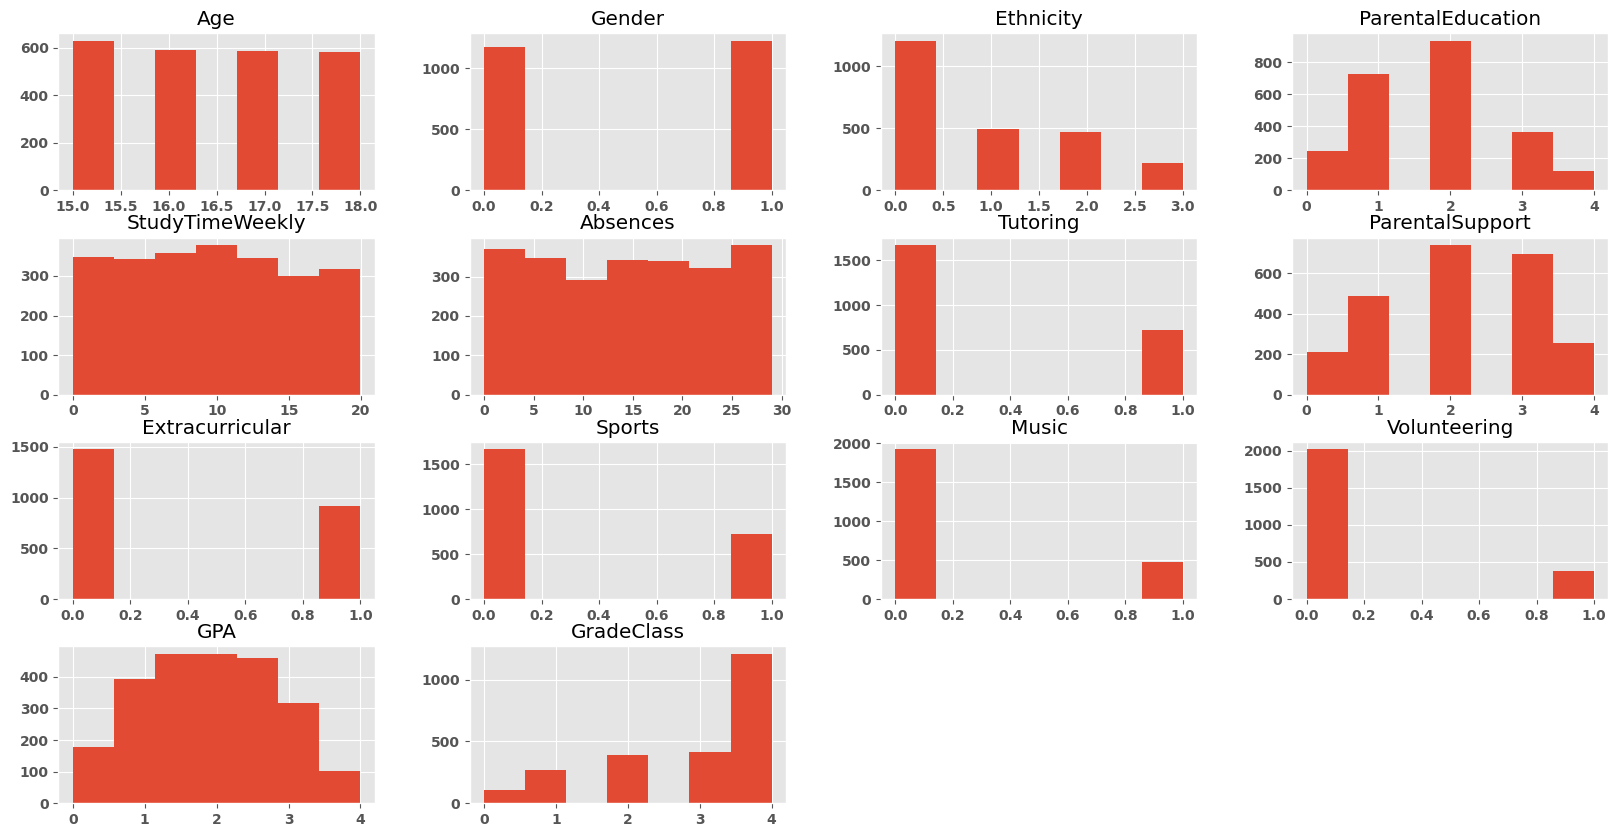

In [9]:
clean_data.hist(figsize=(20,10), bins=7)
plt.show()

Clasificacion de variables numericas y cateogoricas

In [10]:
cols = clean_data.columns

cat_cols = []
num_cols = []

for col in cols:
    if len(clean_data[col].unique()) > 5: #si hay mas de 5 opciones es categorica en este caso
        num_cols.append(col)
    else:
        cat_cols.append(col)
        
print(f'Categoricas: {cat_cols} \nNumericas: {num_cols}')

Categoricas: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass'] 
Numericas: ['StudyTimeWeekly', 'Absences', 'GPA']


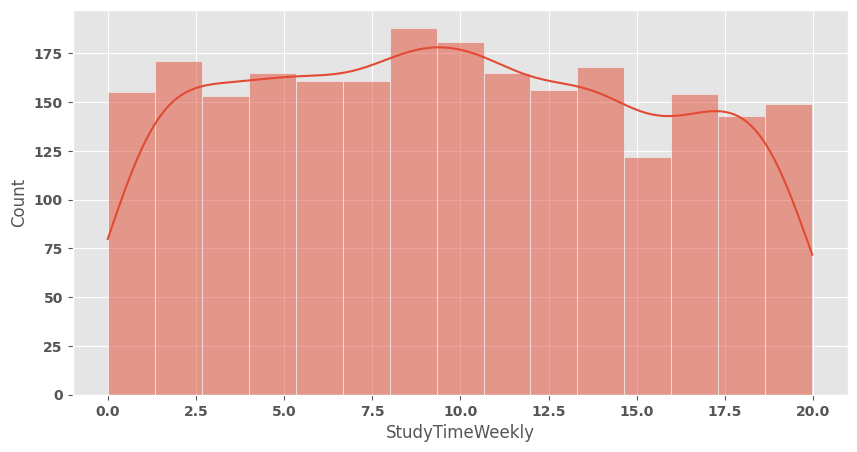

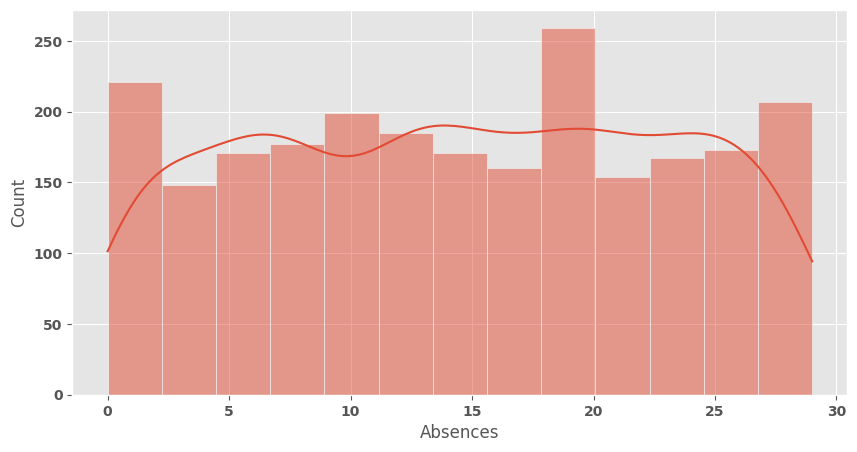

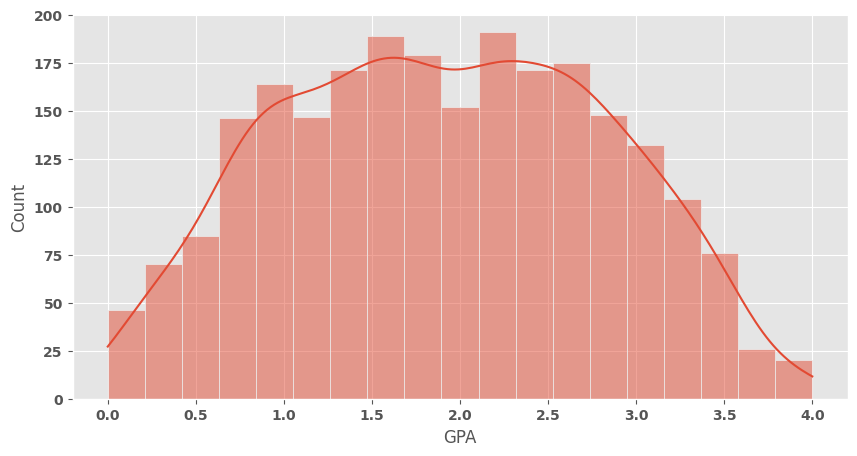

In [11]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(clean_data[col], kde=True)
plt.show()

Aqui podemos ver que el GPA esta distribuido normalmente con media alrededor de 2.0.

Tambien vemos que la ausencias y las horas estudiadas son muy variadas y no todo el mundo estudia la misma cantidada de tiempo, lo cual puede indicar con solo estudiar mucho o poco tiempo no signifca que tendras buenas o malas calificaciones.

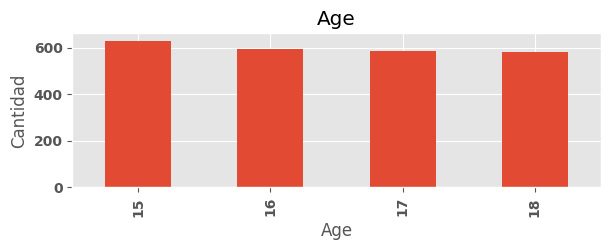

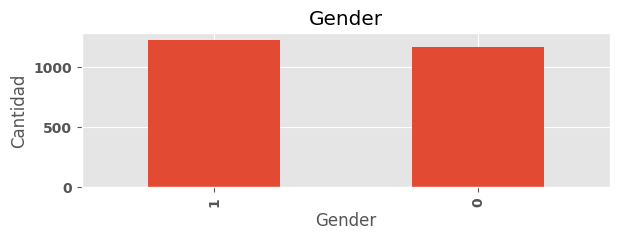

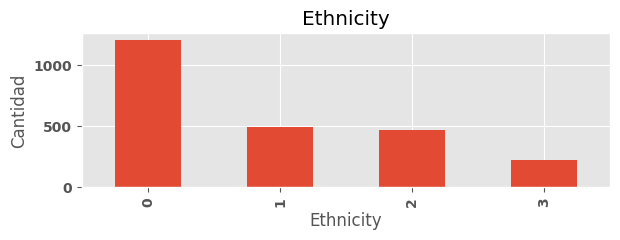

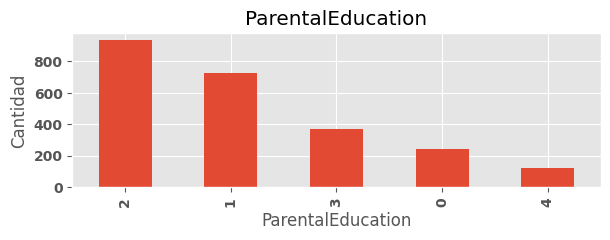

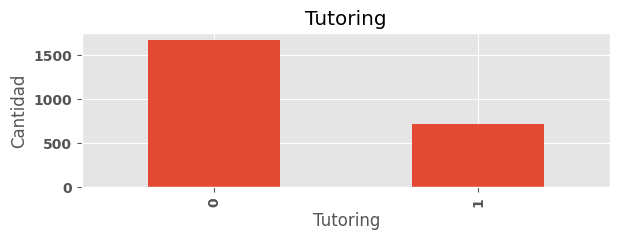

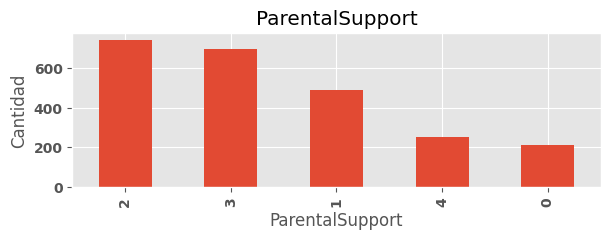

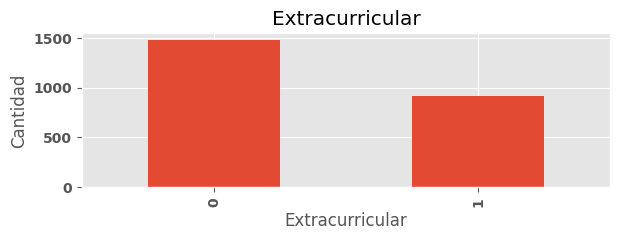

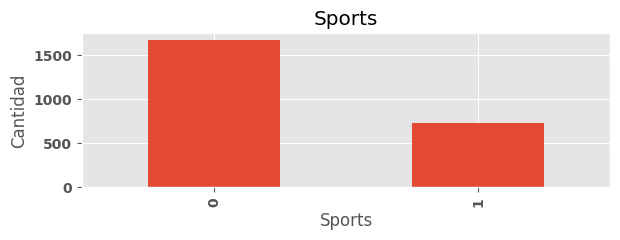

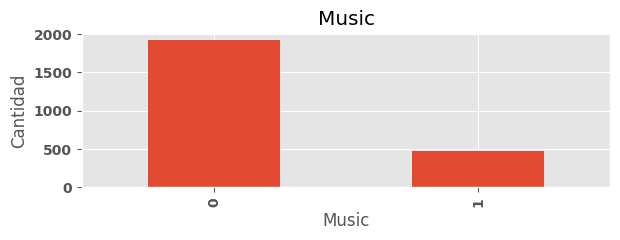

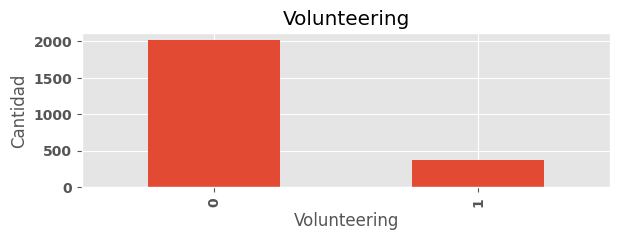

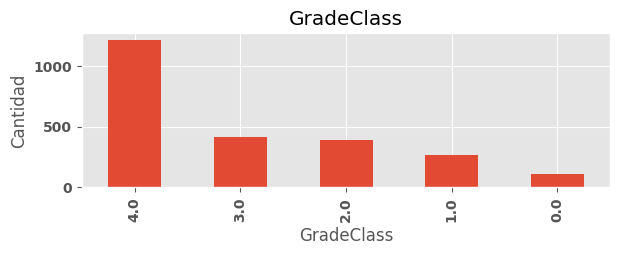

In [12]:
for col in cat_cols:
  plt.figure(figsize=(15,2))
  plt.subplot(121)
  clean_data[col].value_counts().plot(kind='bar')
  plt.xlabel(col)
  plt.ylabel('Cantidad')
  plt.title(col)

In [13]:
clean_data[num_cols] = clean_data[num_cols].astype('float64')

<Axes: >

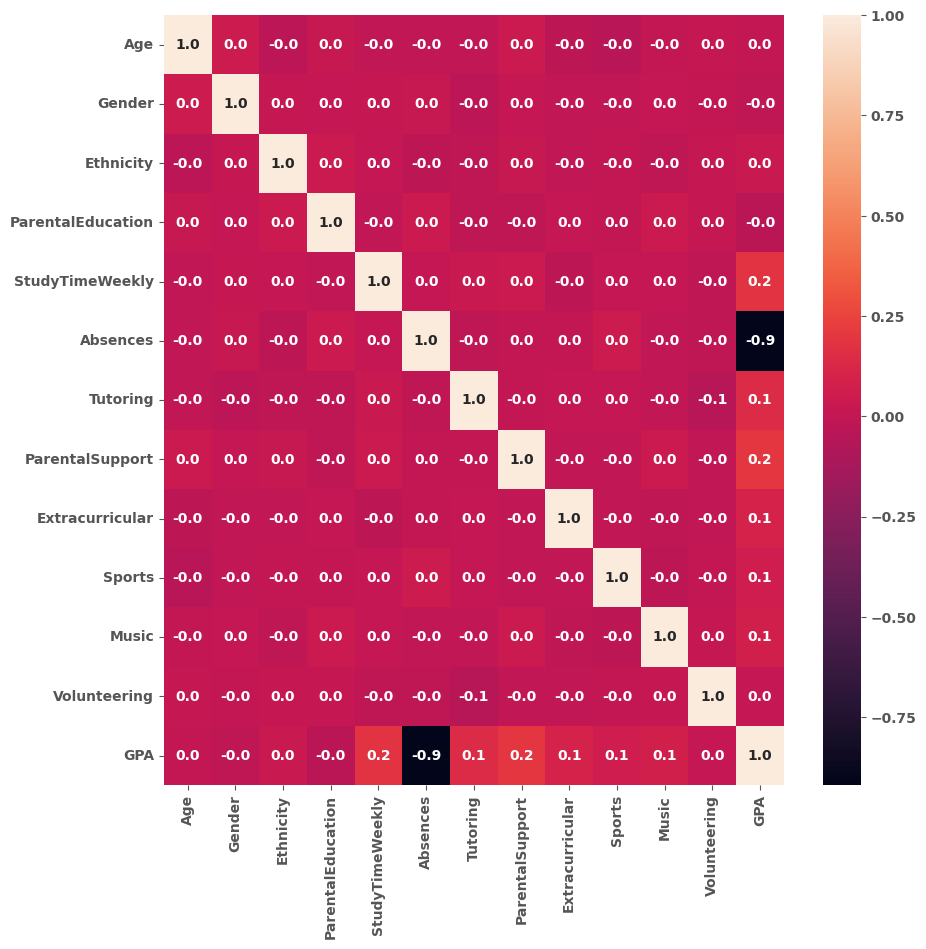

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(clean_data.drop(['GradeClass'], axis=1).corr(numeric_only=True), annot=True, fmt='.1f')

Podemos ver en este heatmap que la mayoria de las variables no tienen correlacion con otras a exepcion de Absencecs la cual tiene correlacion negativa con el GPA, algo que tiene sentido. Por esta razon mas el hecho de que es basicamente la metrica que se usa para calcular la Y, dropearemos esta variable.

Algo de lo que tambien podemos hablar es que la edad no deberia tener mucho que ver con tu nivel de desempeño, ya que un estudiante puede ser malo tanto en primaria como en secundaria por lo que la edad solo añade ruido.



# Preparacion de datos

Para las variables categoricas existen multiples maneras de realizarle preprocesamiento mediante transformaciones.

1. OneHot Encoding: Convierte la columna en multiples dependiendo de la cantidad de valores unicos que existen en esa categoria. 

2. Label Encoding: Conviernte la categoria asignaldo un numero por cada tipo que hay.

3. Ordinal Enconding: Hace lo mismo que el label encoding pero se puede agregar un orden a la categoria. e.g. pequeño, mediano, grande.


En nuestro caso utilizaremos el label encoding, pese a que ya la mayoria de las variables categoricas estan numericas, esto ayudara a estandarizar un poco todas las categorias.



In [99]:
prepro_data = clean_data.copy()

In [109]:
clean_data.to_numpy()[0]

array([17.        ,  1.        ,  0.        ,  2.        , 19.83372281,
        7.        ,  1.        ,  2.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  2.92919559,  2.        ])

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
label_encoder = LabelEncoder()

for col in cat_cols:
    prepro_data[col] = label_encoder.fit_transform(prepro_data[col])
        
prepro_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7.0,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0.0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26.0,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14.0,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17.0,1,3,0,0,0,0,1.288061,4.0


Para las variables numericas, lo que se busca siempre es estandarizar los datos para que le sea mas facil al modelo encontrar patrones. Existen multiples maneras de hacer esto:

1. Normalizacion: Estandariza la variable en un rango de [0,1]

2. Estandarizacion: Transforma las variables para que tengan una media de 0 y desviacion de 1 la cual funciona mejor para variables con rangos y unididaes distintas.

3. Binning: Agrupa los valores en intervalos, similar a lo que se hace para realizar histogramas. Esto ayuda a reducir la variabilidad y simplifica el modelo.

4. Transformacion polinomial: Util para capturar relaciones no lineales entre variables.

Existen otras mas pero estas son las mas usadas. Para el caso de nosotros usaremos el metodo de Estandarizacion ya que las variables nuestras cuentan con diferentes unidades y diferentes rangos.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
standar_scaler = StandardScaler()

prepro_data[num_cols] = standar_scaler.fit_transform(prepro_data[num_cols])

In [20]:
prepro_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,2,1,0,2,1.780336,-0.890822,1,2,0,0,1,0,1.118086,2
1,3,0,0,1,0.997376,-1.717694,0,1,0,0,0,0,1.242374,1
2,0,0,2,3,-0.984045,1.353542,0,2,0,0,0,0,-1.960277,4
3,2,1,0,3,0.045445,-0.063951,0,3,1,0,0,0,0.161790,3
4,2,1,0,2,-0.902311,0.290422,1,3,0,0,0,0,-0.675573,4


Dropeamos las variables que no necesitamos y generamos la X y la Y

In [21]:
X = prepro_data.drop(['GradeClass', 'GPA', 'Age'], axis=1)
y = prepro_data['GradeClass']

In [112]:
X.to_numpy()[0:3]

array([[ 1.        ,  0.        ,  2.        , 19.83372281,  7.        ,
         1.        ,  2.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.        , 15.40875606,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  2.        ,  3.        ,  4.21056977, 26.        ,
         0.        ,  2.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [111]:
y

array([2, 1, 4, ..., 2, 1, 1], dtype=int64)

# Modelamiento

Como a nuestro caso de negocio no le importa mucho si se equivoca. Clasificar a un estudiante en el GPA equivocado solo seria una alarma para tomar otras acciones y no una desicion final. Utilizaremos el accuracy como metrica principal.

In [57]:
from sklearn.metrics import make_scorer,confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, classification_report
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split

In [65]:
def gs_model(model, X, y, params):
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', refit=True, cv=5, verbose=2, n_jobs=-1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    grid_search.fit(X_train, y_train)

    print(grid_search.best_params_)
    
    print(grid_search.best_estimator_)
    
    y_pred = grid_search.predict(X_test)

    print(f'Best score: {grid_search.best_score_}\n')
    
    print(classification_report(y_test, y_pred))
    
    print(confusion_matrix(y_test, y_pred))



    

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

gs_model(model, X, y, param_grid)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=10, penalty='l1', solver='liblinear')
Best score: 0.6583230886540825

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.43      0.34      0.38        70
           2       0.50      0.68      0.57       105
           3       0.48      0.16      0.24       102
           4       0.80      0.98      0.88       298

    accuracy                           0.67       598
   macro avg       0.44      0.43      0.41       598
weighted avg       0.62      0.67      0.62       598

[[  0  14   3   3   3]
 [  0  24  36   1   9]
 [  0  15  71  10   9]
 [  0   2  31  16  53]
 [  0   1   2   3 292]]


## SVM

In [68]:
from sklearn.svm import SVC

In [69]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']
} 

SVM = SVC()

gs_model(SVM, X, y, param_grid)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)
Best score: 0.7486033519553073

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.62      0.59      0.60        80
           2       0.60      0.69      0.64        94
           3       0.58      0.61      0.59        94
           4       0.89      0.91      0.90       304

    accuracy                           0.75       598
   macro avg       0.54      0.56      0.55       598
weighted avg       0.72      0.75      0.73       598

[[  0  15   2   5   4]
 [  0  47  24   3   6]
 [  0  10  65  13   6]
 [  0   1  16  57  20]
 [  0   3   2  21 278]]


## Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

gs_model(model, X, y, param_grid)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
DecisionTreeClassifier(min_samples_leaf=10)
Best score: 0.6939792409081713

              precision    recall  f1-score   support

           0       0.50      0.30      0.37        27
           1       0.36      0.39      0.37        54
           2       0.57      0.53      0.55       106
           3       0.52      0.44      0.47       112
           4       0.82      0.91      0.86       299

    accuracy                           0.68       598
   macro avg       0.55      0.51      0.53       598
weighted avg       0.66      0.68      0.67       598

[[  8   9   0   2   8]
 [  6  21  20   2   5]
 [  1  24  56  17   8]
 [  1   3  22  49  37]
 [  0   2   1  25 271]]


## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
gs_model(model, X, y, param_grid)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=10, n_estimators=200)
Best score: 0.7279874262772132

              precision    recall  f1-score   support

           0       0.80      0.15      0.26        26
           1       0.57      0.49      0.52        76
           2       0.64      0.60      0.62       112
           3       0.58      0.60      0.59       103
           4       0.82      0.92      0.87       281

    accuracy                           0.72       598
   macro avg       0.68      0.55      0.57       598
weighted avg       0.71      0.72      0.70       598

[[  4  15   1   2   4]
 [  1  37  24   3  11]
 [  0  10  67  22  13]
 [  0   1  11  62  29]
 [  0   2   2  18 259]]


## KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

gs_model(model, X, y, param_grid)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')
Best score: 0.6315510185026688

              precision    recall  f1-score   support

           0       0.38      0.11      0.17        27
           1       0.50      0.36      0.42        55
           2       0.49      0.54      0.51       100
           3       0.36      0.27      0.31       100
           4       0.80      0.93      0.86       316

    accuracy                           0.66       598
   macro avg       0.51      0.44      0.45       598
weighted avg       0.63      0.66      0.64       598

[[  3  10   7   0   7]
 [  4  20  21   4   6]
 [  1   7  54  26  12]
 [  0   2  25  27  46]
 [  0   1   4  18 293]]


## Adaboost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
model = AdaBoostClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

gs_model(model, X, y, param_grid)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)
Best score: 0.6867306764600613

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.48      0.33      0.39        64
           2       0.47      0.55      0.51       106
           3       0.44      0.41      0.42        99
           4       0.83      0.92      0.87       302

    accuracy                           0.67       598
   macro avg       0.44      0.44      0.44       598
weighted avg       0.62      0.67      0.64       598

[[  0  12   8   3   4]
 [  0  21  30   4   9]
 [  0   8  58  30  10]
 [  0   2  21  41  35]
 [  0   1   6  16 279]]


## Mejor Modelo

Como se pudo ver en los resultados, los modelos estan dando resultados promedios en terminos de accuracy. El mejor modelo en este caso fue el Support Vector Machine el cual nos dio un accuracy de **~75%**, aunque diriamos que no es un buen modelo para utilizar en el dia a dia debido a que no es capaz de clasificar bien a todo el mundo.

Algo para considerar es que existe un desvalance alto en las variables de salida, existen mas estudiantes clasificados como 4 versus clasificados como 0, lo cual puede afectar mucho a la hora de clasificar.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [102]:
params = {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

num_cols = ['StudyTimeWeekly', 'Absences']

cat_cols =['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']



numeric_transformer = Pipeline(
    steps=[
        ('scalar', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('label', OrdinalEncoder())
    ]
)

preprocesor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

model = SVC(**params)


In [103]:
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocesor),
        ('model', model)
    ]
)

X = clean_data.drop(['GradeClass', 'GPA', 'Age'], axis=1)
y = LabelEncoder().fit_transform(clean_data['GradeClass'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'Absences']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'Ethnicity',
                                                   'ParentalEducation',
                                                   'Tutoring',
                                                   'ParentalSupport',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('model', SVC(C=1000, gamma=0.0001))])

Save Model

In [104]:
import joblib

In [105]:
joblib.dump(model_pipeline, './model/pipeline.joblib')

['./model/pipeline.joblib']